### Сентябрь 2020 г. 
### DST 10 // Юнит 7. Machine Learning в продакшн // MATH&STAT-7. Временные ряды

# 7.1. Вступление к модулю

### ЧТО ЭТО И ЗАЧЕМ?
Временной ряд — это измерения одной и той же случайной величины в разные моменты времени.

Дело в том, что с появлением зависимости наблюдений от времени вся математическая структура данных поменялась — наблюдения одной и той же переменной в разные моменты времени стали зависимыми между собой. Мы получили так называемый временной ряд.

Примеры временных рядов:

- всевозможные экономические индексы, такие как индекс RTS, DJIA и другие;
- стоимость активов на бирже — всевозможные курсы нефти, ценных бумаг, валют и криптовалют:
- физические показатели спортсмена во время тренировок или специальных нагрузочных тестов;
- скорость интернета;
- регулярные измерения роста, веса, давления;
- температура воды в Красном море по дням в июле.

Ещё пара примеров из бизнеса:
- прогнозирование числа пользователей сайта
- прогнозирование удовлетворенности клиента
- прогнозирование трафика

### ЧТО БУДЕМ ИЗУЧАТЬ В ЭТОМ МОДУЛЕ

В этом модуле мы:

Познакомимся с основными идеями и понятиями анализа временных рядов такими, как тренд, сезонность.
Узнаем, чем страшна нестационарность, и как с ней можно бороться.
Познакомимся с некоторыми алгоритмами прогноза.


# 7.2. Линейная регрессия

### УСЛОВИЯ ГАУССА-МАРКОВА
#### Модель: 

Мы предполагаем, что Y зависит от X линейно с небольшой случайной добавкой $\varepsilon$. Настоящие коэффициенты $β_i$ неизвестны и чтобы их оценить, мы берём выборку из n наблюдений

#### Условие 1.

Корректная спецификация модели.
Это значит, что мы сделали верное предположение о характере зависимости (линейной в нашем случае) и собрали «хорошие» признаки.

#### Условие 2.

Признак X должен быть детерминированной величиной, отличной от константы.
Иными словами, все X не случайны и не все равны друг другу.

#### Условие 3.
Ожидаемое (среднее) значение отклонений нулевое

#### Условие 4. 

Гомоскедастичность: разброс отклонений в среднем одинаковый для всех наблюдений
Иными словами, это значит, что разброс ошибок в среднем одинаков для всех наблюдений.

#### Условие 5. 

Независимость ошибок.

Все вместе условия Гаусса-Маркова гарантируют нам «хорошие» оценки для параметров модели  и высокое качество прогноза. «Хорошие» здесь означает, что они несмещённые, состоятельные и эффективные (обладают наименьшим разбросом среди всех остальных несмещённых оценок).

## Задание 7.2.1
Гомоскедастичность — это: Условие равенства всех дисперсий ошибок верно

## Задание 7.2.2
Выберите верные утверждения:
- Гетероскедастичность нарушает условия Гаусса-Маркова
- Сильная отрицательная корреляция между целевой переменной и признаком в парной регрессии не нарушает условия Гаусса-Маркова

## Задание 7.2.3
1. Да
2. Нет
3. Да
4. Нет
5. Да
6. 4
7. 2

## Дополнительные материалы:

[Разные способы построить линейную регрессию в Python](https://habr.com/ru/post/279117/ 'Habr')

# 7.3. Практика. Линейная регрессия
В этом разделе мы познакомимся с генерацией нормального белого шума и посмотрим на практике, как влияет на качество OLS оценок гетероскедастичность.

[Ноутбук к этому материалу](Юнит 7. Machine Learning в продакшн\white_noise.ipynb)

ЗАДАНИЕ

- → Загрузите датасет BostonHousing из библиотеки sklearn (с ним мы работали ранее).

- → Обучите линейную регрессию стоимости дома на параметры CRIM, RM.

- → Выполните задания ниже.

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset
boston = load_boston()
X = pd.DataFrame(boston.data)
X.columns = boston.feature_names
y=pd.DataFrame(boston.target)
y.columns=['PRICE']

In [3]:
# Fit
LR = LinearRegression()
LR.fit(X[['CRIM', 'RM']],y)

LinearRegression()

## Задание 7.3.1
Выведите коэффициенты модели, округлив ответ до сотых:

In [4]:
print('CRIM {:.2f} RM {:.2f} INTERCEPT{:.2f}'.format(LR.coef_[0][0], LR.coef_[0][1], LR.intercept_[0]))

CRIM -0.26 RM 8.39 INTERCEPT-29.24


## Задание 7.3.2
Найдите долю объясненной дисперсии.

In [5]:
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])

In [6]:
round(np.var(y_pred)/np.var(y)[0],2)

0.54

In [7]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.5419591738494084

## Задание 7.3.3
Сгенерируйте вектор белого шума и добавьте к исходным значениям целевой переменой. Обучите модель и найдите R2 (долю объясненной дисперсии).

In [8]:
def white_noise(N = 100, mu = 0, sigma = 1):
    np.random.seed(42)
    return np.random.normal(mu, sigma, size=N)

In [9]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)

In [10]:
plt.scatter(np.arange(N),noise)

NameError: name 'N' is not defined

In [112]:
np.array(y).reshape(506).shape

(506,)

In [79]:
noise.shape

(506,)

In [104]:
y_with_noise = np.array(y).reshape(506) + noise

In [136]:
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)

0.5317591780870768

In [108]:
r2_score(y, y_pred)

0.5419440594477221

Тут сломан валидатор и он принимает числа из диапазона (0, 1)

## Задание 7.3.4

Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром alpha = 1.002 и добавьте к исходным значениям целевой переменной. Обучите модель и найдите R2 (долю объясненной дисперсии).

In [113]:
def hetero_eps(alpha, eps):
    hetero_eps = np.zeros(len(eps))
    for i in range (0,len(eps)):
        hetero_eps[i] = (alpha**i) * eps[i]
    return hetero_eps

In [122]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)
hetero_noise  = hetero_eps(alpha = 1.002, eps = noise)

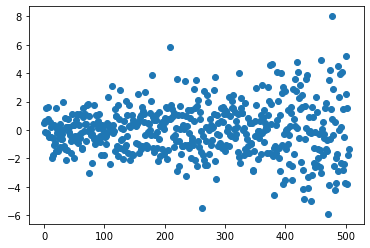

In [123]:
plt.scatter(np.arange(N),hetero_noise)

In [116]:
hetero_noise.shape

(506,)

In [124]:
y_with_noise = np.array(y).reshape(506) + hetero_noise
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)

0.514276959678893

## Задание 7.3.5
В каком случае R2 (доля объясненной дисперсии) получается лучше? Ответ: Для белого шума

## Задание 7.3.6
Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром alpha = 0.998 и добавьте к исходным значениям целевой переменной. Обучите модель и найдите R2 (долю объясненной дисперсии).

In [132]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)
hetero_noise  = hetero_eps(alpha = 0.998, eps = noise)

y_with_noise = np.array(y).reshape(506) + hetero_noise
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)

0.5372516885216415

## Задание 7.3.6
В каком случае  (доля объясненной дисперсии) получается лучше?

In [135]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)

y_with_noise = np.array(y).reshape(506) + noise
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)


0.5317591780870768

## Задание 7.3.7
В каком случае R2 (доля объясненной дисперсии) получается лучше? Ответ: Для гетероскедастичного шума с параметром alpha = 0.988

## Дополнительные материалы
[Оценка результатов линейной регрессии](https://habr.com/ru/post/195146/ 'Habr')

# 7.4. Предсказание и объяснение
Регрессионный анализ решает две основные задачи:

- Задача предсказания состоит в том, чтобы по имеющимся данным предсказать целевую переменную для нового наблюдения.
- Задача объяснения отвечает на вопрос, какие признаки для объяснения целевой переменной значимы.

И решаются эти задачи по-разному!

## Задание 7.4.1
В каких задачах необходимо решать задачу прогнозирования?
- Хотим понять, как будут вести себя акции Google в ближайшие 3 дня
    - Хотим понять, что влияет на рост популярности Ольги Бузовой в Instagram
    - Хотим понять, есть ли расовая дискриминация в карьерном росте сотрудников компании
- Хотим понять, какой будет скорость ветра на чемпионате Европы по виндсерфингу

## Дополнительные материалы
[Подробнее о скользящем среднем и другим методах сглаживания ряда](https://habr.com/ru/company/ods/blog/327242/ 'Открытый курс машинного обучения. Тема 9. Анализ временных рядов с помощью Python')

# 7.5. Скользящее среднее
Напомним, что временной ряд — это измерения одной и той же случайной величины в разные моменты времени.

При этом в идеальном случае соблюдаются условия:
- шаг по времени для всей базовой линии одинаков;
- наблюдения фиксируются в один и тот же момент каждого временного отрезка (например, в полдень каждого дня, первого числа каждого месяца);
- нет пропусков в данных.

Что мы хотим делать с временными рядами?
- Во-первых, выявлять закономерности развития.
- Во-вторых, оценивать, насколько хорошо выявлена закономерность.
- В-третьих, делать прогнозы на будущее, то есть экстраполировать.

## CКОЛЬЗЯЩЕЕ СРЕДНЕЕ
Интуитивно понятный способ превратить непонятную «пилу» в график, на котором можно что-то увидеть — это скользящее среднее или Moving Average (MA). Проще всего взять среднее арифметическое последних двух наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда.

Чуть более продвинутый способ: усреднить сразу несколько наблюдений. Это так называемое простое скользящее среднее (SMA).

Продвинутым вариантом является взвешенное скользящее среднее (WMA) k последовательных наблюдений ряда. Сумма весов при этом равна единице.

## Преимущества
Скользящее среднее может позволить нам невооруженным взглядом найти закономерности во временном ряде. Но может и не позволить, тогда нужны более продвинутые методы анализа.
Скользящее среднее можно использовать для прогноза, однако его качество оставит желать лучшего.

## Недостатки
Недостатком скользящего среднего с фиксированным окном является то, что оно учитывает только несколько последних наблюдений. От этого можно избавиться экспоненциальным сглаживанием, о котором мы поговорим немного позже.


In [163]:
import numpy as np

## Задание 7.5.1
Для анализа временного ряда необходимы следующие условия:
    
- 0  Значения ряда должны быть нескореллированы друг с другом
- 1 Значения ряда должны быть измерены с одинаковым шагом по времени
- 1 Значения ряда не должны иметь пропусков
- 0 Значения ряда в среднем должны быть константой
- 0 Значения ряда должны иметь одинаковые дисперсии

## Задание 7.5.2
Вы вычисляете скользящее среднее по правилу MA = 0.7*x_t +0.3 * x_(t-1)

1. Найдите ширину окна: 2
2. Это скользящее среднее является:
- простым
- взвешенным - верно
3. Вычислите значения простого скользящего среднего для ряда 
- SMA_1: 1.5
- SMA_2: 2.5
- SMA_3: 3.5
- SMA_4: 4.5
- SMA_5: 5.5
4. Какое измерение в ряде X = (1,2,3,4,5,6) является последним по времени: 6
5. Вычислите значения скользящего среднего по правилу  для ряда 
- MA_1: 1.7
- MA_1: 2.7
- MA_1: 3.7
- MA_1: 4.7
- MA_1: 5.7
6. В сторону какого наблюдения смещены значения скользящего среднего из п.5 по сравнению с простым скользящим средним?
- в сторону более нового - верно
- в сторону более старого
7. Сколько значений будет иметь ряд скользящих средних, если у исходного ряда доступно 10 наблюдений? Ответ: 9

## Задание 7.5.3
Выберите верные утверждения для скользящего среднего.
- 1 Скользящее среднее сглаживает пики и выбросы временного ряда
- 0 Скользящее среднее в момент времени  использует только исторические данные ряда в моменты времени, предшествующие 
- 1 Скользящее среднее в момент времени  использует текущее значение ряда 
- 0 В качестве прогноза будущего значения  можно использовать 
- 1 В качестве прогноза будущего значения  нельзя использовать 

## Задание 7.5.4
Простое и взвешенное скользящие средние используют при вычислении:
- 0 Все доступные значения ряда
- 1 Только несколько последних значений ряда

## Задание 7.5.5
1. Для ряда x = (1, 0, 1, -1, 2, 0, 1). Вычислите ряд скользящих средних с шириной окна 3 и весами: 0.5, 0.3, 0.2

In [189]:
def w_m_a(x, w):
    wma_count = len(x) - len(w) + 1
    for i in range(wma_count):
        print('wma_'+str(i+len(w)-1), round(np.sum(x[i:len(w)+i]*w),1))
    #return None

In [191]:
x = np.array([1, 0, 1, -1, 2, 0, 1])
w = np.array([0.2, 0.3, 0.5])
w_m_a(x, w)

wma_2 0.7
wma_3 -0.2
wma_4 0.9
wma_5 0.4
wma_6 0.9


2. Сколько значений будет иметь ряд скользящих средних с шириной окна , если у исходного ряда  наблюдений?

In [192]:
100 - 3 + 1

98

3. Сколько значений будет иметь ряд скользящих средних с шириной окна , если у исходного ряда  наблюдений?

In [193]:
100 - 50 + 1

51

4. Какое из скользящих средних сильнее сгладит исходный ряд?

- SMA с шириной окна 3 
- MA с шириной окна  50 верно

5. Какие из следующих утверждений верны для скользящего среднего за более короткий период времени?
- 1 Скользящее среднее будет меняться быстрее в зависимости от цены
- 0 Скользящее среднее будет медленнее регаировать на изменения цены
- 1 Скользящее среднее будт демонстрировать меньше надежных сигналов, чем более скользящее среднее за более долгий срок
- 0 Скользящее среднее будт демонстрировать больше надежных сигналов, чем более скользящее среднее за более долгий срок

## Дополнительные материалы
- [Скользящие средние. Часть 1 — теория](https://av-finance.ru/texnicheskij-analiz/skolzyashhie-srednie-chast-1-teoriya.html)
- [Использование скользящих средних в трейдинге](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp 'How to Use a Moving Average to Buy Stocks')

## 7.6. Практика. Скользящее среднее

- Загрузите датасет solarpower_cumuldaybyday2.csv.

В нём содержится информация о производстве энергии солнечными батареями.

- Агрегируйте данные по неделям.

- Выполните задания ниже.

In [40]:
import pandas as pd
import numpy as np

In [88]:
# подгрузим наш учебный датасет
df = pd.read_csv('solarpower_cumuldaybyday2.csv')[['date', 'cum_power']]

In [89]:
# приведем формата даты к стандарту datetime. 
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
# добавим столбе дня недели
df['weekday'] = df['date'].apply(lambda x: x.strftime('%a'))
# преобразуем индексы в формат Datetime (это удобно для работы с временными рядами) 
df = df.set_index(pd.DatetimeIndex(df['date']))
# после это удалим столбец data
df.drop(['date'], axis =1, inplace = True)

In [96]:
list(df.columns)

['cum_power', 'weekday']

In [100]:
# Агрегируйте данные по неделям.
df_w = df[(list(df.columns))]
df_w = df_w.resample('w').ffill()

In [99]:
df_w.head(10)

,cum_power,weekday
date,,
2011-10-30,34.2,Sun
2011-11-06,71.8,Sun
2011-11-13,99.9,Sun
2011-11-20,136.5,Sun
2011-11-27,156.1,Sun
2011-12-04,175.3,Sun
2011-12-11,192.6,Sun
2011-12-18,205.4,Sun
2011-12-25,219.7,Sun


In [103]:
df_w.iloc[0]

cum_power    34.2
weekday       Sun
Name: 2011-10-30 00:00:00, dtype: object